In [15]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astroplan import Observer
from astropy.time import Time
from astropy.timeseries import LombScargle
from scipy.stats import pearsonr
import pandas as pd
from tqdm import tqdm

In [16]:
files = os.listdir('npz')
otherParams = np.load("otherParams.npz", allow_pickle=True)
result = np.load("refSpectrum.npz")
wavelength = result["arr_0"]
flux = result["arr_1"]

minima = np.concatenate([wavelength[i][otherParams["arr_0"][i]] for i in range(8, 100)])
print(len(minima))

7376


In [17]:
avgRVErrLine = np.empty(shape=(len(files), len(minima)))
for i in range(len(files)):
    arrays = np.load('npz/'+files[i],  allow_pickle=True)
    avgRVErrLine[i] = np.concatenate(arrays["arr_1"][8:100])
avgRVErrLine = np.nanmean(avgRVErrLine, axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [18]:
dupMask = np.zeros(len(minima), dtype=bool)
for i in range(len(minima)):
    zL = np.abs(minima - minima[i])
    duplicates = np.where((zL < 0.1))[0]
    if (len(duplicates) > 1):
        dupMask[duplicates[duplicates != duplicates[np.argmin(avgRVErrLine[duplicates])]]] = True
dupMask[np.where(avgRVErrLine == np.nan)] = True

meansr,means,neidrv,time,error,angle = np.zeros(len(files)),np.zeros(len(files)),np.zeros(len(files)),np.zeros(len(files)),\
np.zeros(len(files)),np.zeros(len(files))

lineDepth = np.concatenate(otherParams["arr_2"][8:100])[~dupMask]
contDiff = np.concatenate(otherParams["arr_1"][8:100])[~dupMask]
lineDepthr = np.concatenate(otherParams["arr_2"][70:100])
contDiffr = np.concatenate(otherParams["arr_1"][70:100])

for i in tqdm(range(len(files))):
    angle[i] = fits.open('data/'+files[i][:-7]+'.fits')[0].header['SUNAGL']
    neidrv[i] = fits.open('data/'+files[i][:-7]+'.fits')[12].header['CCFRVMOD']*1000
    time[i] = fits.open('data/'+files[i][:-7]+'.fits')[12].header['CCFJDMOD']

100%|████████████████████████████████████████████████████████████████████████████████| 254/254 [00:13<00:00, 19.11it/s]


In [27]:
RVArrays = []
RVErrArrays = []

for i in tqdm(range(len(files))):
    
    arrays = np.load('npz/'+files[i],  allow_pickle=True)

    RVred = np.concatenate(arrays["arr_0"][70:100])
    RVErrred = np.concatenate(arrays["arr_1"][70:100])
    cutr = np.where((RVErrred < 3*np.nanmean(RVErrred)) & (lineDepthr > 0.0) & (contDiffr < 1) &\
                (np.abs(RVred - np.nanmean(RVred)) < 3*np.nanstd(RVred)))    
    meansr[i] = np.sum(RVred[cutr]/(RVErrred[cutr]**2))/np.sum(1/(RVErrred[cutr]**2))

    
    RV = np.concatenate(arrays["arr_0"][8:100])[~dupMask]
    RVErr = np.concatenate(arrays["arr_1"][8:100])[~dupMask]
    
    cut = np.where((RVErr < 3*np.nanmean(RVErr)) & (lineDepth > 0.05) & (contDiff < 0.1) &\
            (np.abs(RV - np.nanmean(RV)) < 3*np.nanstd(RV)))
    
    RVArrays.append(RV)
    RVErrArrays.append(RVErr)
        
RVArrays = np.stack(RVArrays)
RVErrArrays = np.stack(RVErrArrays)
    
pearsonCorr = np.zeros(len(RVArrays.T))
for i in range(len(RVArrays.T)):
    line = RVArrays.T[i]
    try:
        pearsonCorr[i] = pearsonr(meansr[~np.isnan(line)], line[~np.isnan(line)])[0]
    except:
        pearsonCorr[i] = np.nan    

for i in range(len(files)):
    RV = RVArrays[i]
    RVErr = RVErrArrays[i]
    
    cut = np.where((RVErr < 3*np.nanmean(RVErr)) & (lineDepth > 0.005) & (contDiff < 0.05) &\
    (np.abs(RV - np.nanmean(RV)) < 3*np.nanstd(RV))& (np.abs(pearsonCorr) < 0.5))
    
    print(len(RV[cut]))
        
    means[i] = np.sum(RV[cut]/(RVErr[cut]**2))/np.sum(1/(RVErr[cut]**2))
    error[i] = np.mean(RVErr[cut])

100%|███████████████████████████████████████████████████████████████████████████████| 254/254 [00:01<00:00, 162.59it/s]


1634
1634
1635
1634
1633
1634
1634
1632
1635
1635
1633
1634
1634
1635
1634
1633
1635
1634
1634
1634
1632
1634
1635
1634
1634
1634
1634
1632
1633
1634
1634
1633
1634
1634
1634
1633
1634
1631
1634
1633
1632
1633
1634
1633
1632
1633
1633
1633
1632
1633
1629
1632
1626
1632
1632
1631
1633
1631
1633
1633
1632
1629
1632
1632
1633
1633
1627
1633
1633
1631
1629
1630
1632
1632
1629
1632
1629
1628
1633
1633
1632
1628
1631
1632
1631
1633
1630
1632
1627
1630
1630
1631
1632
1628
1632
1632
1630
1630
1631
1631
1631
1632
1631
1631
1631
1628
1633
1623
1631
1632
1633
1630
1629
1633
1631
1629
1633
1631
1631
1630
1629
1632
1631
1631
1631
1632
1630
1629
1631
1632
1631
1630
1630
1629
1632
1625
1632
1629
1633
1632
1631
1632
1625
1632
1628
1631
1631
1632
1630
1632
1630
1630
1633
1632
1630
1630
1629
1631
1631
1630
1632
1633
1630
1631
1631
1631
1630
1632
1630
1633
1632
1630
1632
1631
1633
1632
1631
1630
1630
1633
1631
1632
1632
1632
1631
1626
1633
1631
1633
1633
1632
1633
1633
1633
1633
1633
1633
1633
1632
1631


In [28]:
kittpeak = Observer.at_site("Kitt Peak", timezone="MST")
timeNoon = (time - (kittpeak.noon(Time(time[0], format='jd'))).value)*24

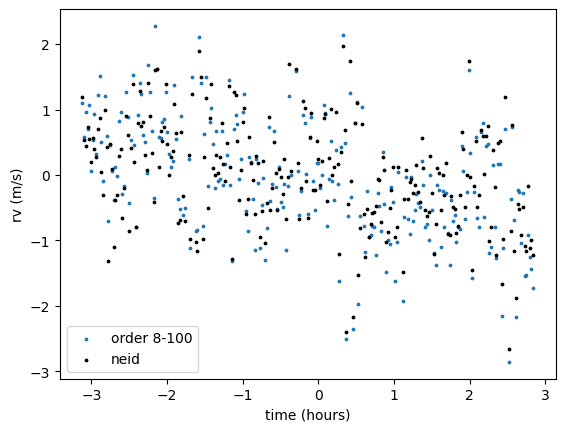

In [30]:
plt.figure(1)

plt.scatter(timeNoon, -1*means, s=3, label="order 8-100")

#plt.scatter(timeNoon, neidrv-np.mean(neidrv)-means,s=1,label="residuals")
plt.scatter(timeNoon, neidrv-np.mean(neidrv), s=3, label="neid", color="black")
plt.legend(loc="best")
#plt.errorbar(time, means, yerr=errors, linestyle='',capsize=3)
plt.ylabel("rv (m/s)")
plt.xlabel("time (hours)")
plt.show()

#np.savez("RVinfo", timeNoon, neidrv, meansr, meansg, meansb)

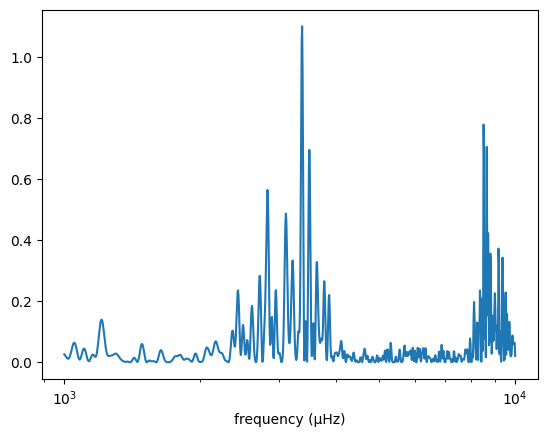

In [31]:
frequency = (10**np.linspace(-3,-2,1000))
frequ = 3600*frequency

ls1 = LombScargle(timeNoon, means, error)
power = ls1.power(frequ)
falsealarm = ls1.false_alarm_probability(power)
powerNorm = ls1.false_alarm_level(0.01)
#plt.xlim(1, 10)
plt.xscale("log")
plt.plot(frequency*(10**6), power/powerNorm,label="1.5 min ")
plt.xlabel("frequency (µHz)")
plt.show()